In [0]:

from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
mnist = fetch_openml('Fashion-MNIST', version =1)



In [0]:
mnist.data.shape

(70000, 784)

In [0]:
X_train, y_train = mnist.data[:60_000], mnist.target[:60_000]
X_test, y_test = mnist.data[60_000:], mnist.target[60_000:]


In [0]:
import numpy as np

In [0]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1  # d equals 187

In [0]:
print(d)

187


In [0]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)
     

In [0]:
print(pca.n_components_)
print(pca.explained_variance_ratio_.sum())

187
0.9500039103537347


In [0]:
import  matplotlib.pyplot as plt

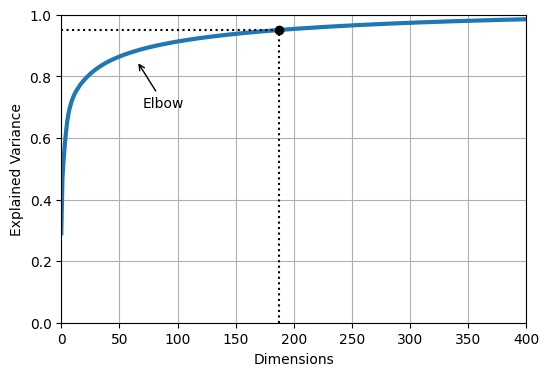

In [0]:
# extra code – this cell generates and saves Figure 8–8

plt.figure(figsize=(6, 4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"))
plt.grid(True)
plt.show()

In [0]:
#let us train a simple Multiclass CLassifcation model using the 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix



In [0]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_reduced, y_train)

RandomForestClassifier(random_state=42)

In [0]:
# Make predictions
y_pred = clf.predict(pca.transform(X_test))

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82      1000
           1       1.00      0.95      0.97      1000
           2       0.75      0.79      0.77      1000
           3       0.86      0.88      0.87      1000
           4       0.76      0.79      0.78      1000
           5       0.92      0.93      0.93      1000
           6       0.70      0.55      0.62      1000
           7       0.93      0.93      0.93      1000
           8       0.92      0.96      0.94      1000
           9       0.93      0.94      0.94      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

[[848   0  16  36   7   7  68   0  18   0]
 [  6 954   5  29   3   0   1   0   2   0]
 [ 14   0 791   9 108   0  69   0   9   0]
 [ 30   3  10 882  34   1  32   0   8   0]
 [  0   0 109  35 792   0  57   0   7   0]
 [  0   0   0   0   0 933 

In [0]:
from sklearn.metrics import accuracy_score

In [0]:
accuracy_score(y_test,y_pred)

0.8587

After reducing the dimensions to 187, and just training a simple RF classifier we were able to get an accuracy of 85%

In [0]:
#lets try to visualize these 187 dimension in 3d
pca3d = PCA(n_components=3,random_state =32)

In [0]:
vis_data = pca3d.fit_transform(pca.transform(X_test))

In [0]:
#prepping data for Visualization
import pandas as pd
df = pd.DataFrame(vis_data, columns=['x', 'y', 'z'])
df['target'] = y_test.to_numpy('int')

In [0]:
import plotly.express as px

In [0]:
fig = px.scatter_3d(df, x='x', y='y', z='z',
              color='target',
                   template='plotly_dark',
                   color_continuous_scale=px.colors.sequential.Rainbow)
# fig.show()
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.update_traces(marker_size=1)
     

In [0]:
%